In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
import joblib

In [16]:
df = pd.read_csv("../sample/sample-fixx.csv")
df.head()

,throughput,delay,jitter,packet_loss,availability,label
0,13281.276525,13.172339,6.691711,0.050865,99.990412,Sangat Baik
1,16331.603750,35.957706,5.431525,0.163004,99.994967,Sangat Baik
2,11467.442269,9.411797,4.862291,0.072086,99.998931,Sangat Baik
3,12196.549006,2.088432,6.971013,0.185696,99.996131,Sangat Baik
4,19590.602872,17.072167,8.048031,0.379041,99.996104,Sangat Baik


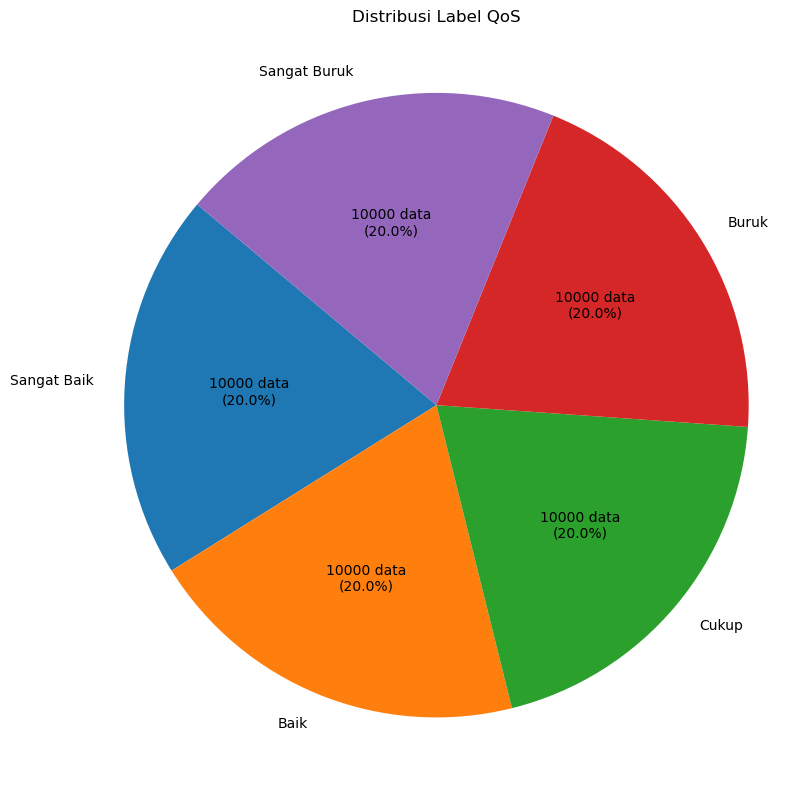

In [17]:
label_counts = df['label'].value_counts()

def autopct_format(pct, allvals):
    absolute = int(round(pct/100.*sum(allvals)))
    return f"{absolute} data\n({pct:.1f}%)"


plt.figure(figsize=(8, 8))
plt.pie(
    label_counts,
    labels=label_counts.index,
    autopct=lambda pct: autopct_format(pct, label_counts),
    startangle=140
)
plt.title("Distribusi Label QoS")
plt.axis('equal') 
plt.tight_layout()
plt.show()

In [18]:
le = LabelEncoder()
df['label_encoded'] = le.fit_transform(df['label'])

In [19]:
X = df[['throughput', 'delay', 'jitter', 'packet_loss', 'availability']]
y = df['label']

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [21]:
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train_scaled

array([[0.05479716, 0.37118578, 0.41997514, 0.2627718 , 0.91180596],
       [0.08566527, 0.365103  , 0.46863147, 0.30347487, 0.90240416],
       [0.02179505, 0.50504237, 0.97367613, 0.68710394, 0.171251  ],
       ...,
       [0.09830558, 0.48892037, 0.41298409, 0.30059878, 0.9307033 ],
       [0.63232484, 0.01557519, 0.07840054, 0.0314088 , 0.99994011],
       [0.4124466 , 0.15682761, 0.17910746, 0.07207675, 0.98465007]])

In [22]:
model = GaussianNB()
model.fit(X_train, y_train)

GaussianNB()

In [23]:
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred) * 100
precision = precision_score(y_test, y_pred, average='weighted') * 100
recall = recall_score(y_test, y_pred, average='weighted') * 100
f1 = f1_score(y_test, y_pred, average='weighted') * 100

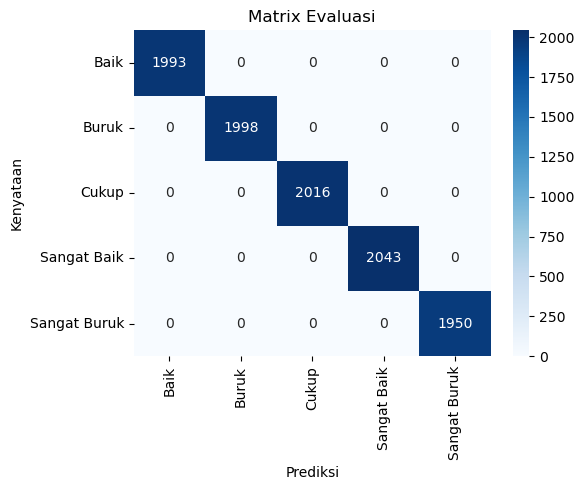

In [24]:
cm = confusion_matrix(y_test, y_pred)
labels = sorted(list(set(y_test)))

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels)
plt.title("Matrix Evaluasi")
plt.xlabel("Prediksi")
plt.ylabel("Kenyataan")
plt.tight_layout()
plt.show()

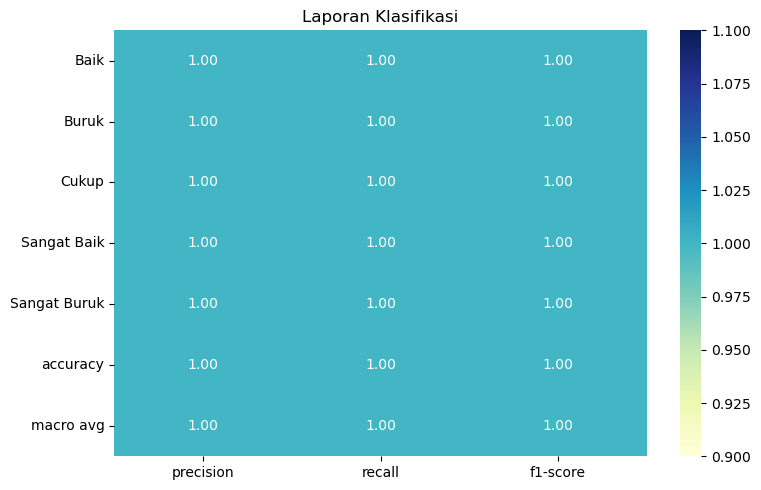

In [25]:
report = classification_report(y_test, y_pred, output_dict=True)
df_report = pd.DataFrame(report).transpose()

plt.figure(figsize=(8, 5))
sns.heatmap(df_report.iloc[:-1, :-1], annot=True, cmap="YlGnBu", fmt=".2f")
plt.title("Laporan Klasifikasi")
plt.tight_layout()
plt.show()

In [26]:
print(f"Akurasi   : {accuracy:.2f}%")
print(f"Presisi   : {precision:.2f}%")
print(f"Recall    : {recall:.2f}%")
print(f"F1-Score  : {f1:.2f}%")

print("\nClassification Report:")
print(classification_report(y_test, y_pred, digits=2))


Akurasi   : 100.00%
Presisi   : 100.00%
Recall    : 100.00%
F1-Score  : 100.00%

Classification Report:
              precision    recall  f1-score   support

        Baik       1.00      1.00      1.00      1993
       Buruk       1.00      1.00      1.00      1998
       Cukup       1.00      1.00      1.00      2016
 Sangat Baik       1.00      1.00      1.00      2043
Sangat Buruk       1.00      1.00      1.00      1950

    accuracy                           1.00     10000
   macro avg       1.00      1.00      1.00     10000
weighted avg       1.00      1.00      1.00     10000



In [27]:
joblib.dump(model, 'model-nb.sav')
print("Model berhasil disimpan sebagai 'model-nb.sav'")

Model berhasil disimpan sebagai 'model-nb.sav'
